In [1]:
import pandas as pd
import numpy as np
from scipy import stats
from scipy.optimize import curve_fit
import matplotlib.pyplot as plt
from sklearn.metrics import mean_absolute_percentage_error
from sklearn.metrics import r2_score

In [2]:
eagle205=pd.read_csv('eagle205.csv')

In [3]:
eagle0=pd.read_csv('eagle0.csv')

In [4]:
def harmonic_arps(t, qi, b, Di):
    return qi / (1 +  Di * t)

In [5]:
def exponential_arps(t, qi, b, Di):
    return qi * np.exp(-Di * t)

In [6]:
def hyperbolic_arps(t, qi, b, Di):
    return qi / (1 + b * Di * t)**(1/b)

In [7]:
def arps_fit(series, production_data, function):
   
    period = series.name
    df = production_data.copy().query('period == @period')
    try:
        result = curve_fit(f=function, 
                             xdata=df.day, 
                             ydata=df.flowrate,
                             p0=[df.flowrate[0], 0.5, 1e-4],
                             bounds=([0, 1e-8, -np.inf], [np.inf, 1, np.inf]),
                           max_nfev=1e6
                             )
    except:
        return [np.nan, np.nan, np.nan]
    else:
        return result[0]

In [8]:
production_oil = pd.read_csv('production_oil.csv', index_col=0)
production_oil

period    day  Gas Volume (MMscf)  flowrate  \
OSPREY  OSPREY_64.0_1101.0    0.0            0.027333     76.92   
OSPREY  OSPREY_64.0_1101.0    1.0            0.027333     76.92   
OSPREY  OSPREY_64.0_1101.0    2.0            0.176000    493.65   
OSPREY  OSPREY_64.0_1101.0    3.0            0.117000    425.98   
OSPREY  OSPREY_64.0_1101.0    4.0            0.144000    412.29   
...                    ...    ...                 ...       ...   
CROW       CROW_24.0_216.0  188.0            0.133330    266.26   
CROW       CROW_24.0_216.0  189.0            0.135090    265.92   
CROW       CROW_24.0_216.0  190.0            0.113220    259.30   
CROW       CROW_24.0_216.0  191.0            0.141830    203.33   
CROW       CROW_24.0_216.0  192.0            0.153190    267.92   

        Gas Lift Inj Volume  (MMscf)  Pressure Source _Tubing Pressure  \
OSPREY                         0.000                                 0   
OSPREY                         0.000                                 0   
OSPREY                         0.000                                 0   
OSPREY                         0.000                                 0   
OSPREY                         0.000                                 0   
...                              ...                               ...   
CROW                           0.348                                 1   
CROW                           0.239                                 1   
CROW                           0.330                                 1   
CROW                           0.349                                 1   
CROW                           0.362                                 1   

        Casing_Pressure_ksia  Tubing_Pressure_ksia  Active_Pressure_ksia  \
OSPREY              0.084696              0.134696              0.084696   
OSPREY              0.084696              0.134696              0.084696   
OSPREY              0.084696              0.124696              0.084696   
OSPREY              0.089696              0.194696              0.089696   
OSPREY              0.084696              0.214696              0.084696   
...                      ...                   ...                   ...   
CROW                0.786794              0.159099              0.159099   
CROW                0.783952              0.165143              0.165143   
CROW                0.789266              0.160803              0.160803   
CROW                0.775899              0.229061              0.229061   
CROW                0.788670              0.154334              0.154334   

        Line_Pressure_ksia  Calculated_Sandface_Pressure_ksia  \
OSPREY            0.014696                           0.651026   
OSPREY            0.014696                           0.651026   
OSPREY            0.014696                           0.619325   
OSPREY            0.014696                           0.630685   
OSPREY            0.014696                           0.622196   
...                    ...                                ...   
CROW              0.115516                           1.610868   
CROW              0.115516                           1.782222   
CROW              0.115516                           1.656360   
CROW              0.115516                           1.555338   
CROW              0.115516                           1.699383   

        water_thousand_bbl  
OSPREY             0.07100  
OSPREY             0.07100  
OSPREY             0.10500  
OSPREY             0.08300  
OSPREY             0.05700  
...                    ...  
CROW               0.13000  
CROW               0.13500  
CROW               0.13133  
CROW               0.09292  
CROW               0.19300  

[8876 rows x 12 columns]

In [9]:
periods_oil = production_oil.period.unique()

In [10]:
results_oil = pd.DataFrame(index=periods_oil)

In [11]:
results_oil[['qi_expon', 'D_expon']] = results_oil\
    .index\
    .to_frame()\
    .apply(arps_fit,
           axis=1,
           result_type='expand',
           **{'production_data': production_oil,
             'function': exponential_arps}).iloc[:, [0, 2]]

results_oil

qi_expon   D_expon
OSPREY_64.0_1101.0     211.532843  0.002759
OSPREY_1101.0_1302.0   593.280963  0.006492
OSPREY_1302.0_1602.0   406.968695  0.005499
OSPREY_1602.0_2355.0   170.774352  0.001472
EAGLE_0.0_205.0       1218.383975  0.006504
EAGLE_205.0_1483.0     414.370737  0.001429
KITE_111.0_1066.0      183.608020  0.002829
SWIFT_0.0_144.0        539.999897  0.005990
SWIFT_144.0_896.0      435.620172  0.003555
SWIFT_896.0_1245.0      64.757650  0.002001
SPARROW_0.0_156.0      654.999919  0.006416
SPARROW_156.0_887.0    354.169985  0.003234
SPARROW_887.0_1245.0    71.669993  0.001330
LARK_122.0_438.0       425.620694  0.005391
LARK_438.0_783.0       137.673564  0.002173
CARDINAL_0.0_119.0     379.585925  0.003629
CARDINAL_119.0_486.0   329.579882  0.005487
CARDINAL_486.0_781.0   107.266621  0.003905
JAY_0.0_132.0          347.282511  0.004671
JAY_132.0_480.0        234.318864  0.006568
JAY_480.0_782.0         60.541307  0.003523
CROW_24.0_216.0        928.957388  0.008342

In [12]:
def metrics_aprs2(series, production, function, col_qi, col_Di):
    
    period = series.name
    temp = production\
        .query('period == @period')
    flowrate_pred = temp.day.apply(function, **{'qi': series[col_qi], 'b': 0, 'Di': series[col_Di]})
    return r2_score(temp.flowrate, flowrate_pred), mean_absolute_percentage_error(flowrate_pred, temp.flowrate)

In [13]:
results_oil[['R2_expon', 'rel_error_expon']] = results_oil\
    .apply(metrics_aprs2, 
           axis=1, 
           result_type='expand', 
           **{'production': production_oil,
             'function': exponential_arps,
             'col_qi': 'qi_expon',
              'col_Di': 'D_expon'})
results_oil

qi_expon   D_expon  R2_expon  rel_error_expon
OSPREY_64.0_1101.0     211.532843  0.002759  0.702510         0.464787
OSPREY_1101.0_1302.0   593.280963  0.006492  0.459291         0.185598
OSPREY_1302.0_1602.0   406.968695  0.005499  0.411116         0.529699
OSPREY_1602.0_2355.0   170.774352  0.001472  0.342088         0.333869
EAGLE_0.0_205.0       1218.383975  0.006504  0.656047         0.129437
EAGLE_205.0_1483.0     414.370737  0.001429  0.701135         0.234742
KITE_111.0_1066.0      183.608020  0.002829  0.484299         0.583697
SWIFT_0.0_144.0        539.999897  0.005990  0.373546         0.114453
SWIFT_144.0_896.0      435.620172  0.003555  0.573526         0.441939
SWIFT_896.0_1245.0      64.757650  0.002001  0.263753         0.140455
SPARROW_0.0_156.0      654.999919  0.006416  0.698875         0.102128
SPARROW_156.0_887.0    354.169985  0.003234  0.742482         0.319410
SPARROW_887.0_1245.0    71.669993  0.001330  0.242932         0.145855
LARK_122.0_438.0       425.620694  0.005391  0.704894         0.254285
LARK_438.0_783.0       137.673564  0.002173  0.501862         0.103323
CARDINAL_0.0_119.0     379.585925  0.003629  0.692006         0.052127
CARDINAL_119.0_486.0   329.579882  0.005487  0.709640         0.284671
CARDINAL_486.0_781.0   107.266621  0.003905  0.455851         0.138999
JAY_0.0_132.0          347.282511  0.004671  0.382439         0.119863
JAY_132.0_480.0        234.318864  0.006568  0.661720         0.413978
JAY_480.0_782.0         60.541307  0.003523  0.418757         0.127341
CROW_24.0_216.0        928.957388  0.008342  0.904250         0.109950

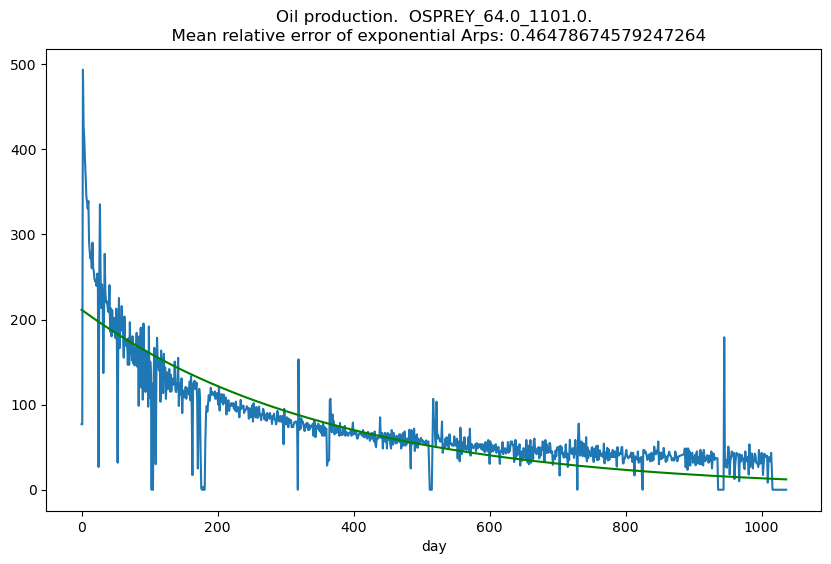

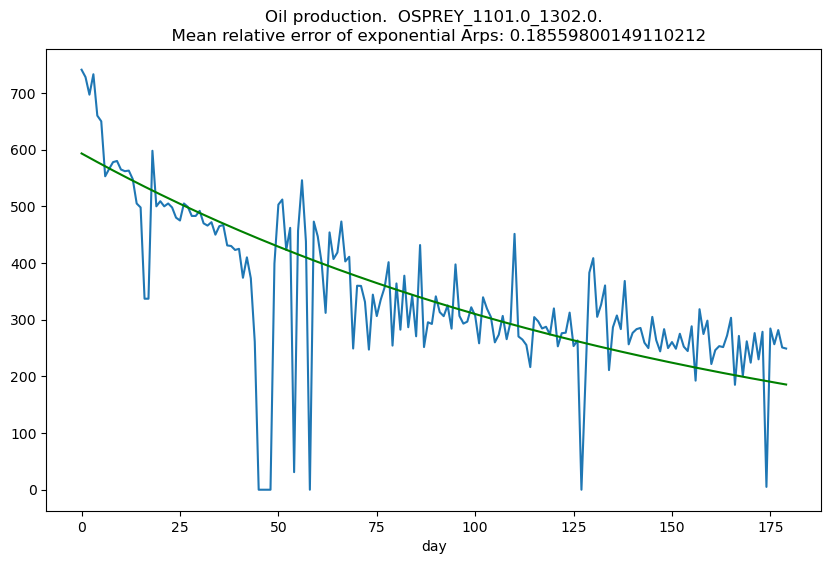

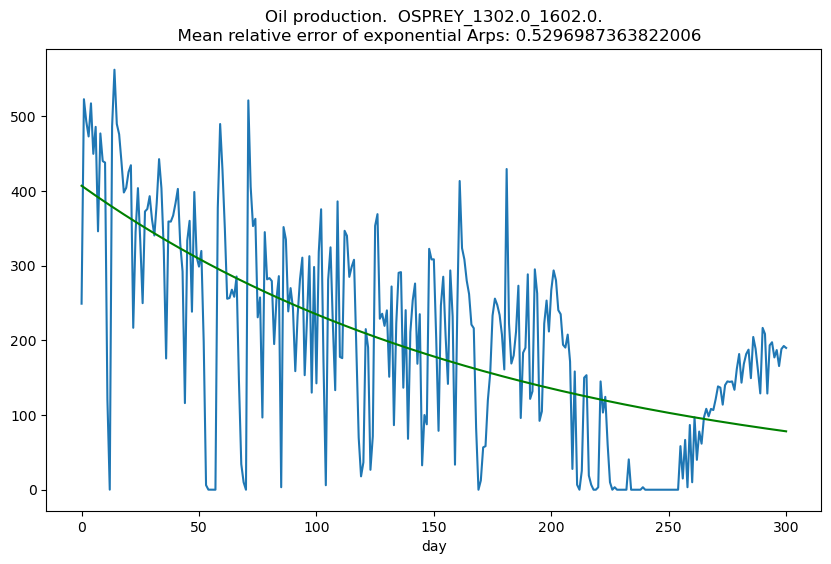

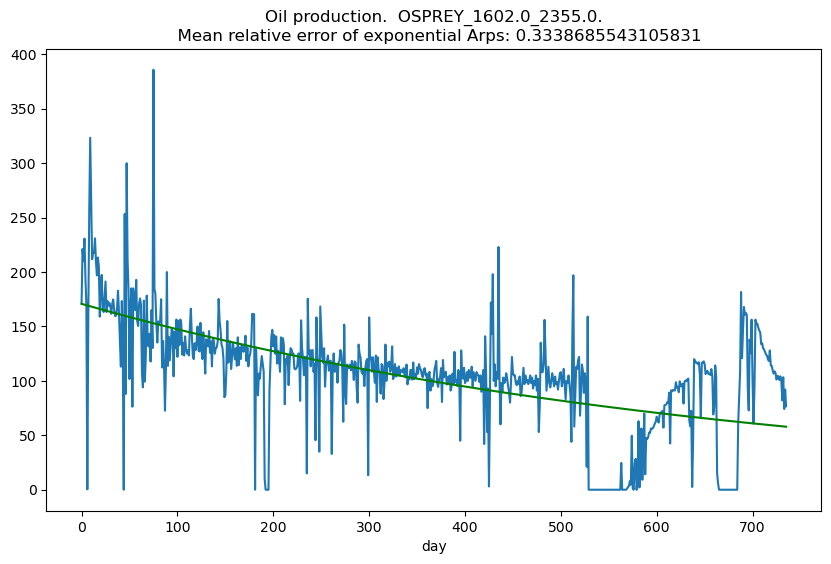

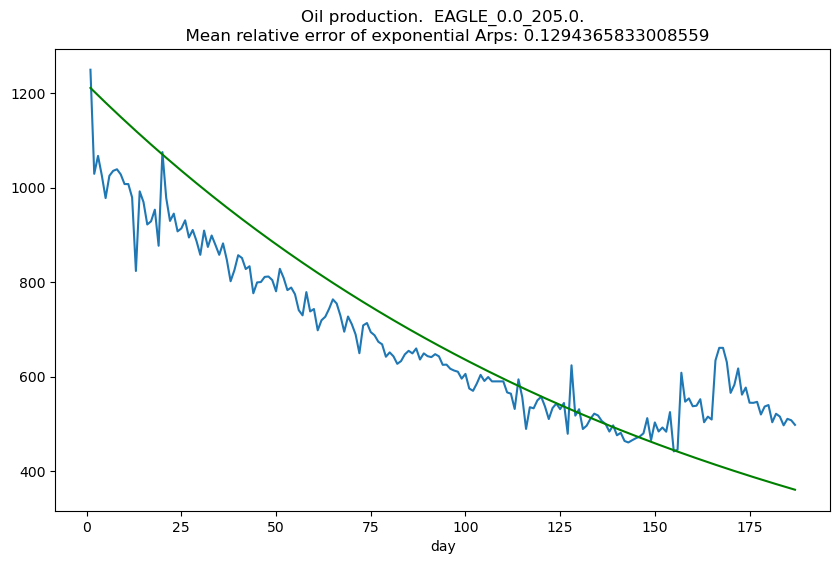

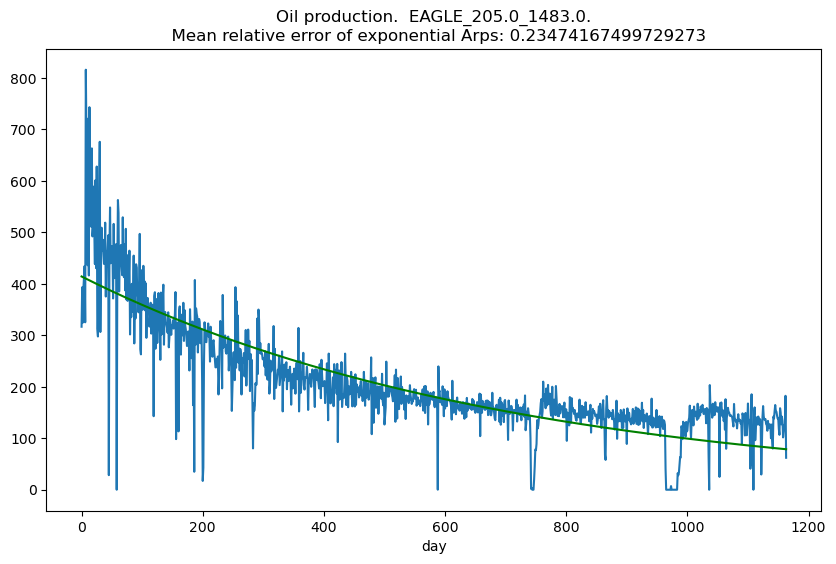

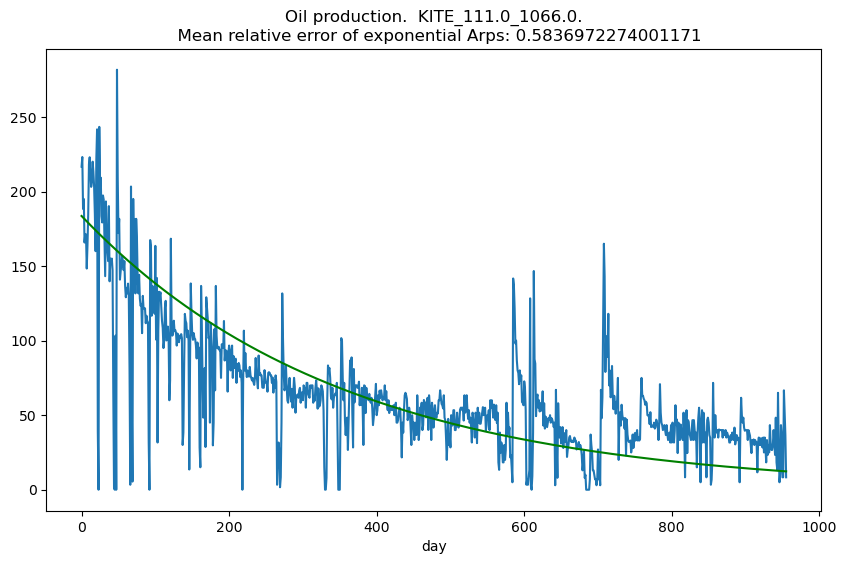

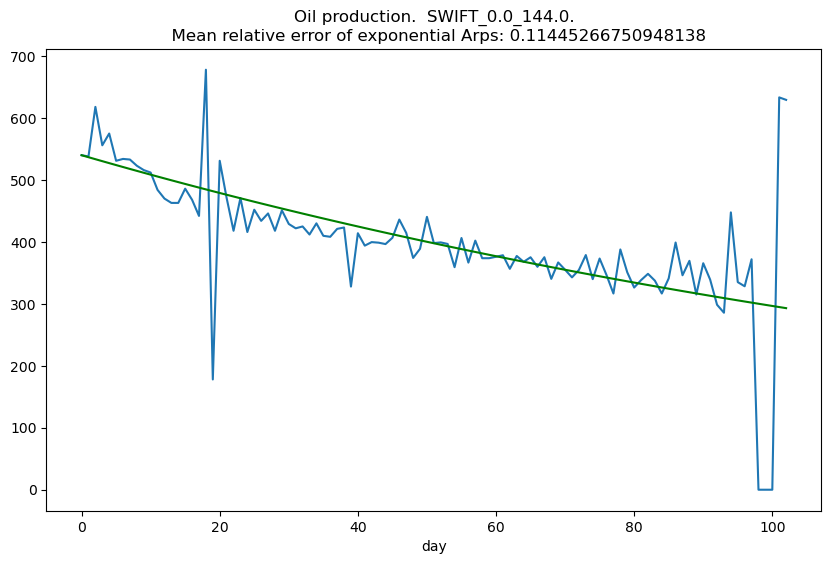

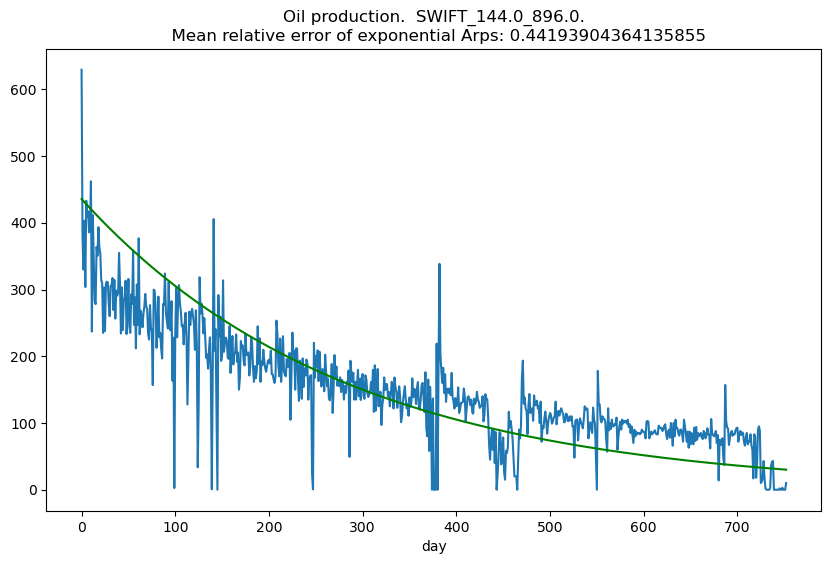

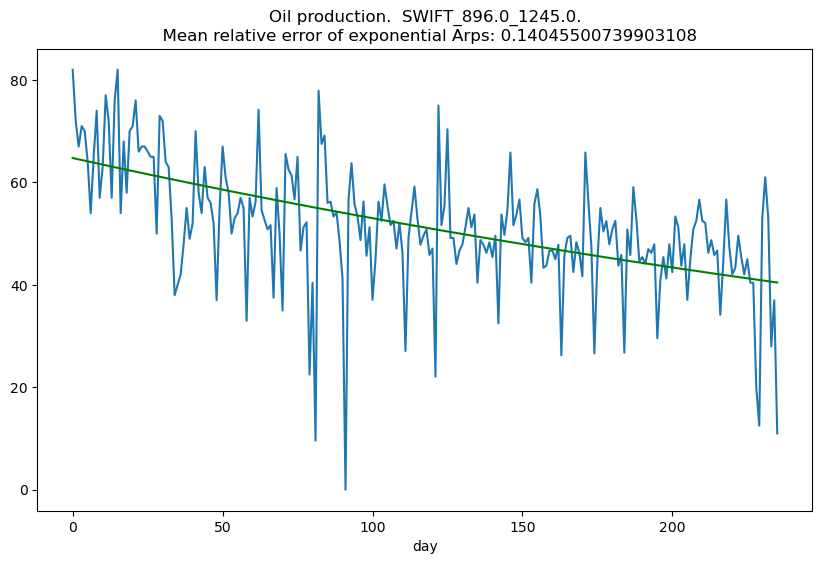

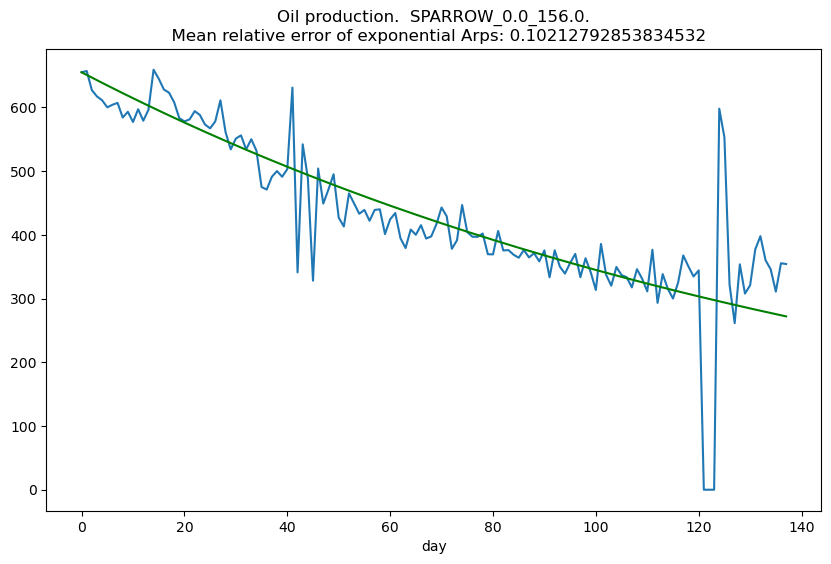

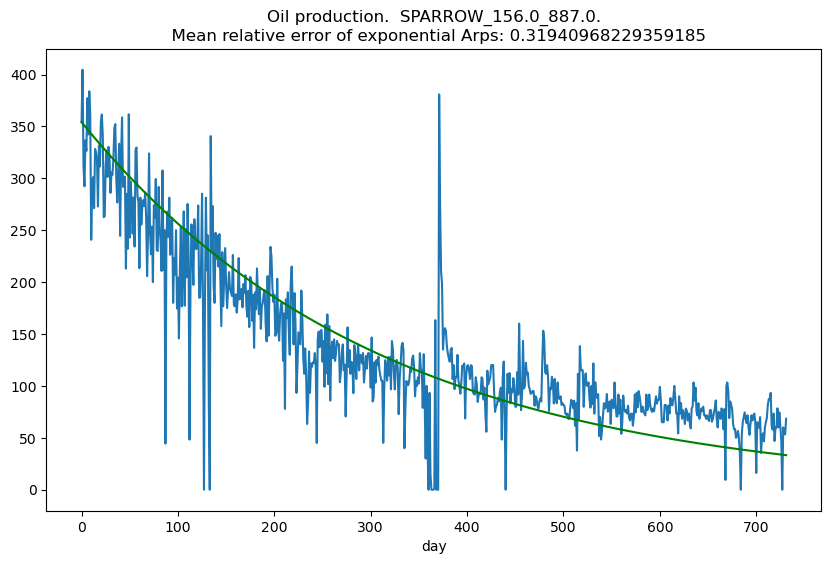

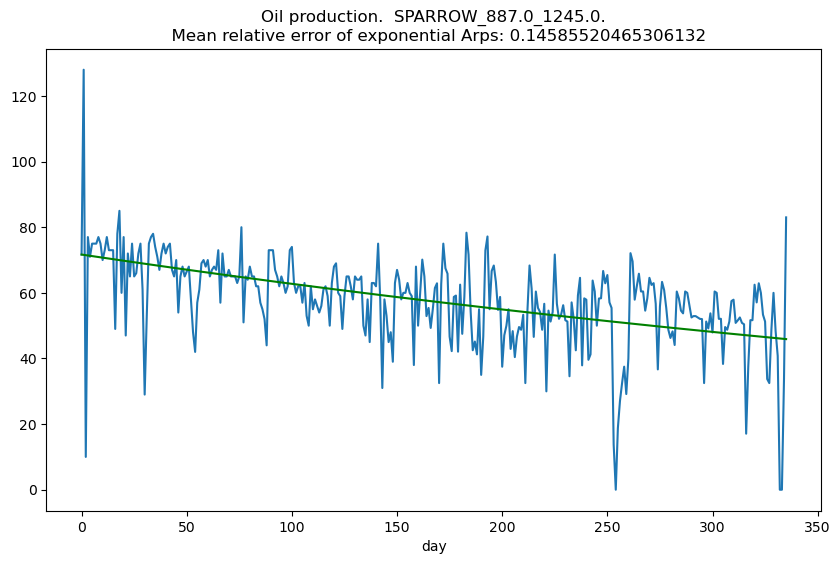

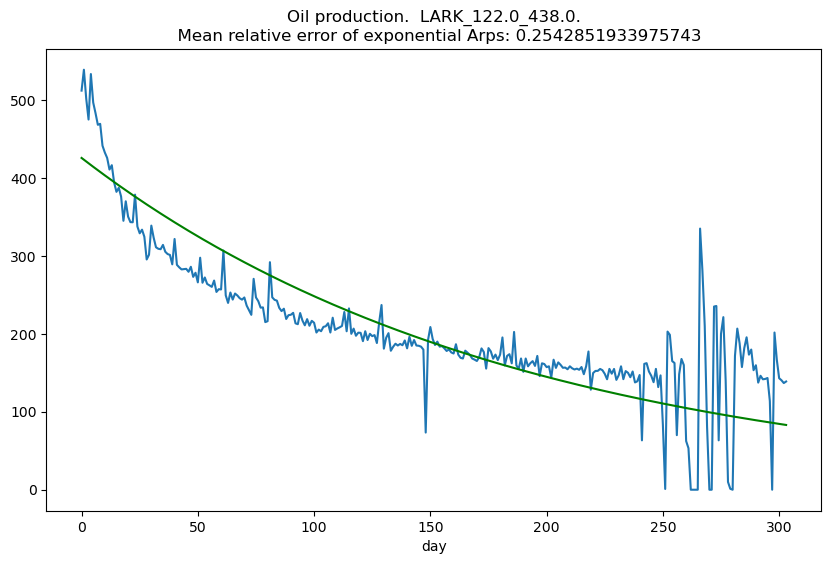

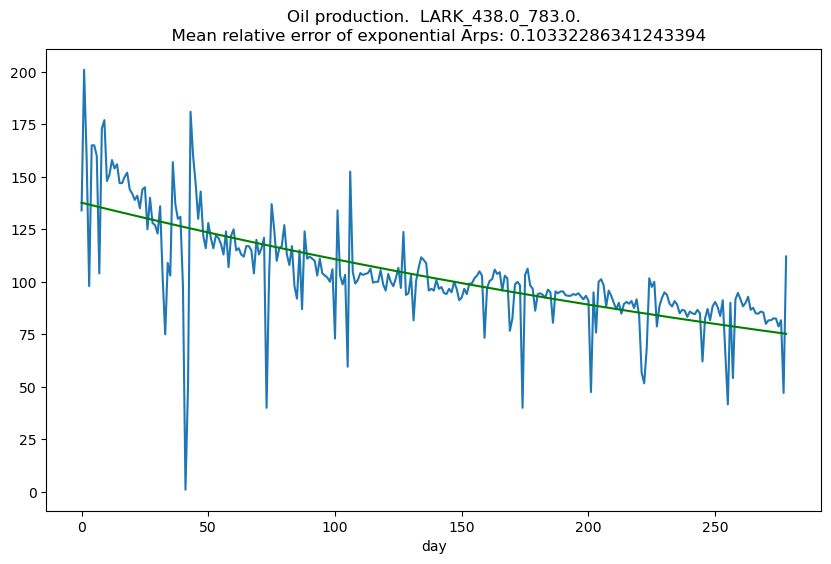

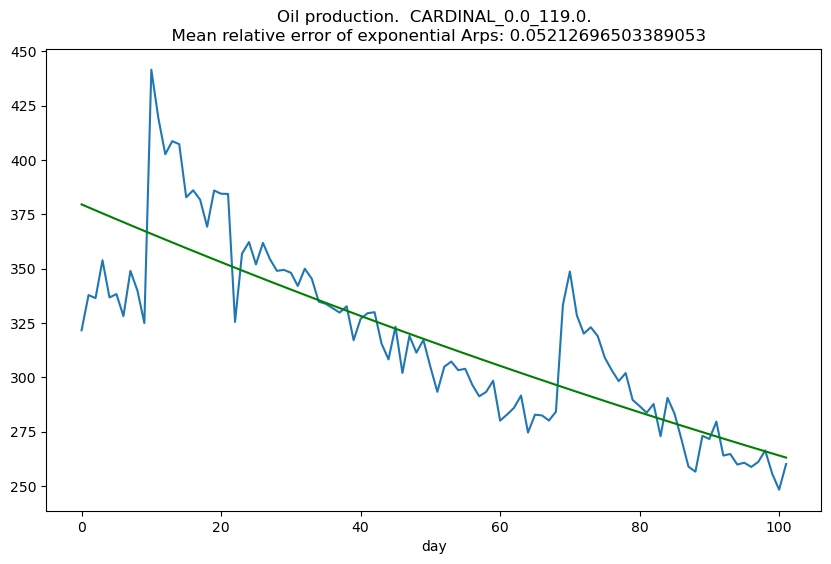

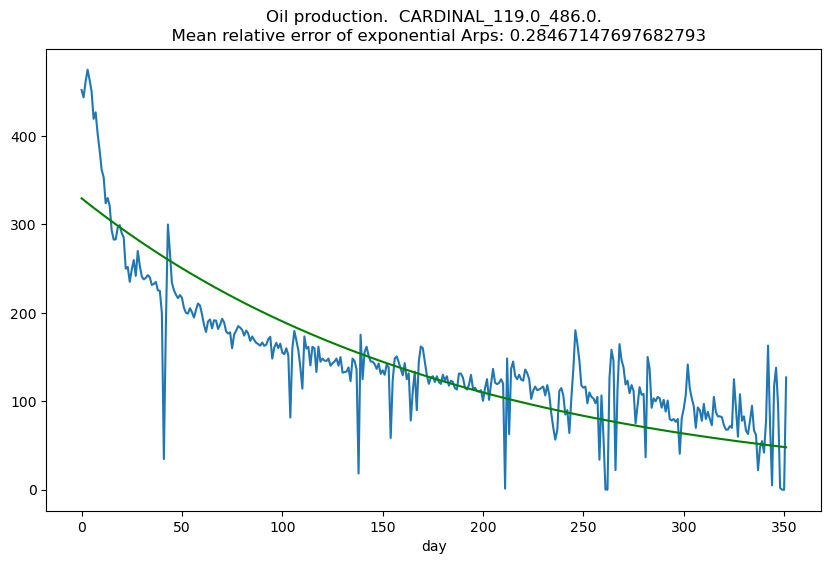

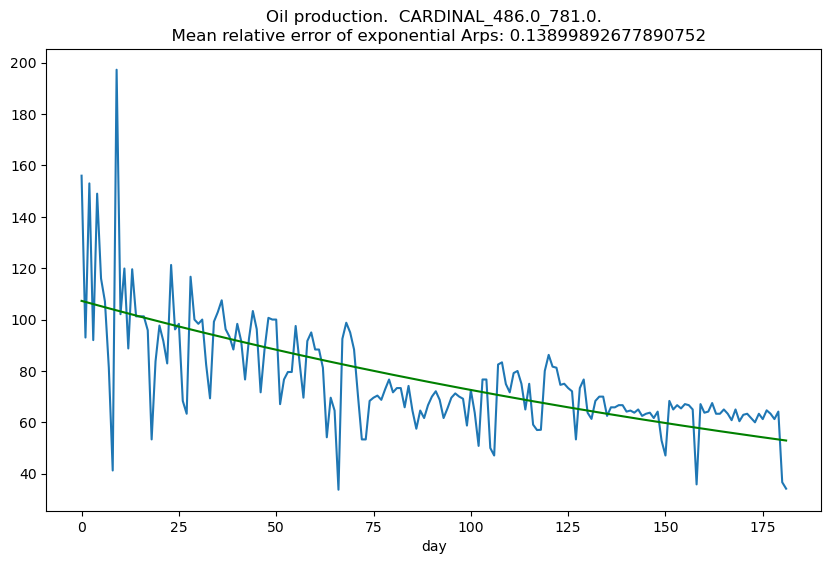

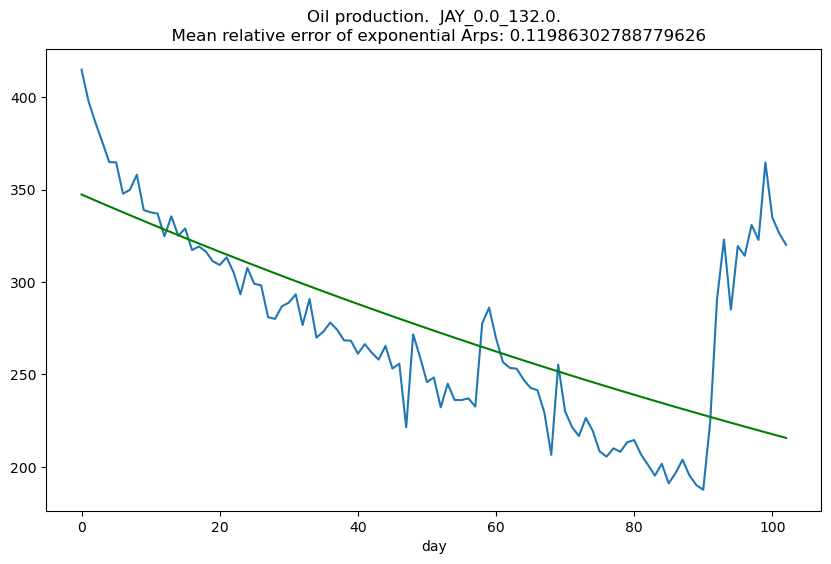

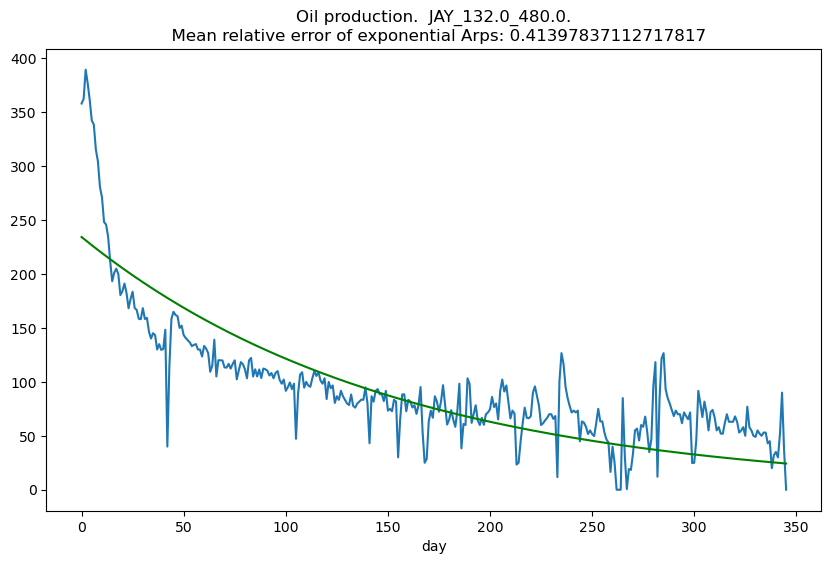

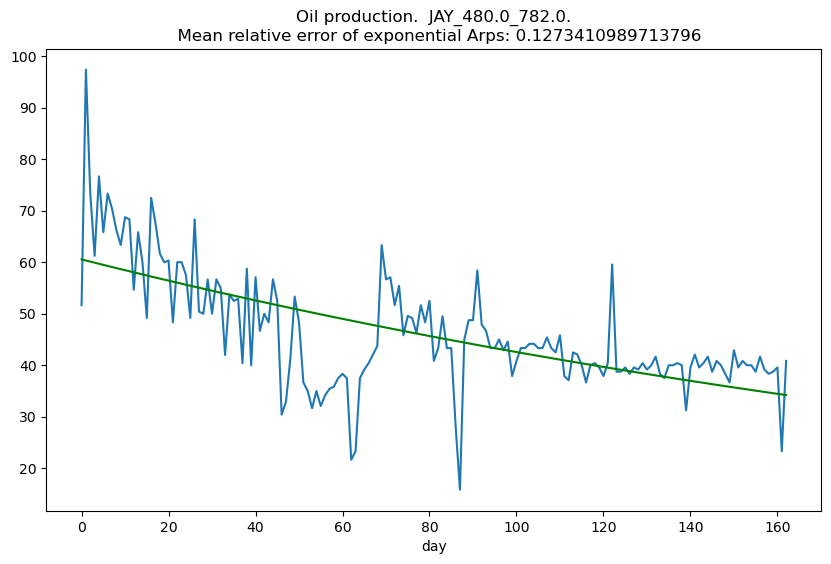

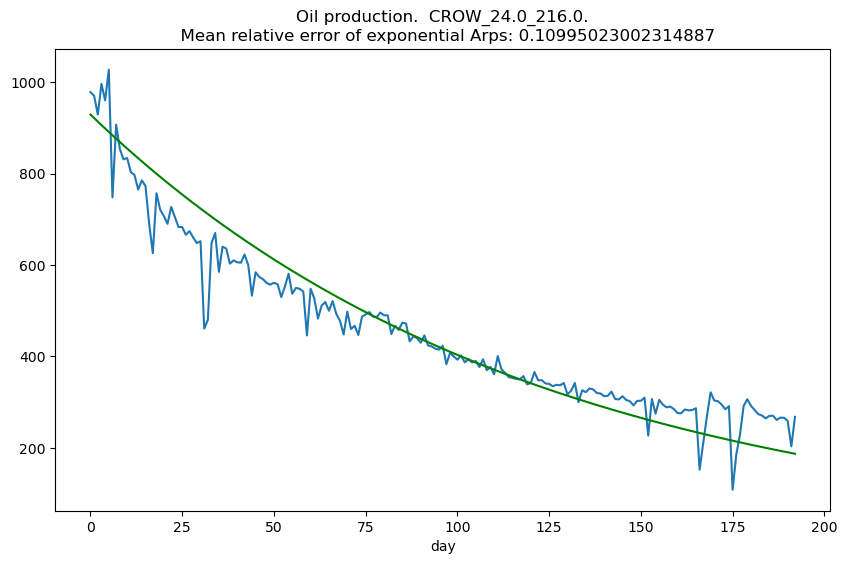

In [14]:
for period in periods_oil:
    qi = results_oil.loc[period, 'qi_expon']
    b = 0
    Di = results_oil.loc[period, 'D_expon']
    fig, ax = plt.subplots(figsize=(10,6))
    actual = production_oil.query('period == @period')
    actual.plot.line('day',
                        'flowrate', 
                        legend=False,
                        ax=ax,
                       title='Oil production.  {}.\n  Mean relative error of exponential Arps: {}'\
                             .format(period, 
                                     
                                    results_oil.loc[period, 'rel_error_expon']))
    flowrate_pred = actual.day.apply(exponential_arps, **{'qi': qi, 'b': b, 'Di': Di})
    plt.plot(actual.day, flowrate_pred, 'g')
    plt.show();

In [15]:
results_oil[['qi_harmonic', 'Di_harmonic']] = results_oil\
    .index\
    .to_frame()\
    .apply(arps_fit,
           axis=1,
           result_type='expand',
           **{'production_data': production_oil,
             'function': harmonic_arps}).iloc[:, [0, 2]]

results_oil

qi_expon   D_expon  R2_expon  rel_error_expon  \
OSPREY_64.0_1101.0     211.532843  0.002759  0.702510         0.464787   
OSPREY_1101.0_1302.0   593.280963  0.006492  0.459291         0.185598   
OSPREY_1302.0_1602.0   406.968695  0.005499  0.411116         0.529699   
OSPREY_1602.0_2355.0   170.774352  0.001472  0.342088         0.333869   
EAGLE_0.0_205.0       1218.383975  0.006504  0.656047         0.129437   
EAGLE_205.0_1483.0     414.370737  0.001429  0.701135         0.234742   
KITE_111.0_1066.0      183.608020  0.002829  0.484299         0.583697   
SWIFT_0.0_144.0        539.999897  0.005990  0.373546         0.114453   
SWIFT_144.0_896.0      435.620172  0.003555  0.573526         0.441939   
SWIFT_896.0_1245.0      64.757650  0.002001  0.263753         0.140455   
SPARROW_0.0_156.0      654.999919  0.006416  0.698875         0.102128   
SPARROW_156.0_887.0    354.169985  0.003234  0.742482         0.319410   
SPARROW_887.0_1245.0    71.669993  0.001330  0.242932         0.145855   
LARK_122.0_438.0       425.620694  0.005391  0.704894         0.254285   
LARK_438.0_783.0       137.673564  0.002173  0.501862         0.103323   
CARDINAL_0.0_119.0     379.585925  0.003629  0.692006         0.052127   
CARDINAL_119.0_486.0   329.579882  0.005487  0.709640         0.284671   
CARDINAL_486.0_781.0   107.266621  0.003905  0.455851         0.138999   
JAY_0.0_132.0          347.282511  0.004671  0.382439         0.119863   
JAY_132.0_480.0        234.318864  0.006568  0.661720         0.413978   
JAY_480.0_782.0         60.541307  0.003523  0.418757         0.127341   
CROW_24.0_216.0        928.957388  0.008342  0.904250         0.109950   

                      qi_harmonic  Di_harmonic  
OSPREY_64.0_1101.0     307.636541     0.010203  
OSPREY_1101.0_1302.0   632.017686     0.011333  
OSPREY_1302.0_1602.0   462.393841     0.011453  
OSPREY_1602.0_2355.0   182.050047     0.002463  
EAGLE_0.0_205.0       1158.463050     0.008776  
EAGLE_205.0_1483.0     503.375264     0.003430  
KITE_111.0_1066.0      199.629763     0.006533  
SWIFT_0.0_144.0        539.973643     0.007486  
SWIFT_144.0_896.0      401.897500     0.006195  
SWIFT_896.0_1245.0      65.575821     0.002522  
SPARROW_0.0_156.0      668.698186     0.009138  
SPARROW_156.0_887.0    361.753703     0.006259  
SPARROW_887.0_1245.0    71.669992     0.001567  
LARK_122.0_438.0       455.717824     0.010380  
LARK_438.0_783.0       142.894802     0.003074  
CARDINAL_0.0_119.0     382.239345     0.004269  
CARDINAL_119.0_486.0   398.104928     0.014004  
CARDINAL_486.0_781.0   111.577582     0.005703  
JAY_0.0_132.0          356.172008     0.006298  
JAY_132.0_480.0        322.338504     0.022077  
JAY_480.0_782.0         63.465468     0.005186  
CROW_24.0_216.0        970.682607     0.014972

In [16]:
results_oil[['R2_harmonic', 'rel_error_harmonic']] = results_oil\
    .apply(metrics_aprs2, 
           axis=1, 
           result_type='expand', 
           **{'production': production_oil,
             'function': harmonic_arps,
             'col_qi': 'qi_harmonic',
              'col_Di': 'Di_harmonic'})
results_oil

qi_expon   D_expon  R2_expon  rel_error_expon  \
OSPREY_64.0_1101.0     211.532843  0.002759  0.702510         0.464787   
OSPREY_1101.0_1302.0   593.280963  0.006492  0.459291         0.185598   
OSPREY_1302.0_1602.0   406.968695  0.005499  0.411116         0.529699   
OSPREY_1602.0_2355.0   170.774352  0.001472  0.342088         0.333869   
EAGLE_0.0_205.0       1218.383975  0.006504  0.656047         0.129437   
EAGLE_205.0_1483.0     414.370737  0.001429  0.701135         0.234742   
KITE_111.0_1066.0      183.608020  0.002829  0.484299         0.583697   
SWIFT_0.0_144.0        539.999897  0.005990  0.373546         0.114453   
SWIFT_144.0_896.0      435.620172  0.003555  0.573526         0.441939   
SWIFT_896.0_1245.0      64.757650  0.002001  0.263753         0.140455   
SPARROW_0.0_156.0      654.999919  0.006416  0.698875         0.102128   
SPARROW_156.0_887.0    354.169985  0.003234  0.742482         0.319410   
SPARROW_887.0_1245.0    71.669993  0.001330  0.242932         0.145855   
LARK_122.0_438.0       425.620694  0.005391  0.704894         0.254285   
LARK_438.0_783.0       137.673564  0.002173  0.501862         0.103323   
CARDINAL_0.0_119.0     379.585925  0.003629  0.692006         0.052127   
CARDINAL_119.0_486.0   329.579882  0.005487  0.709640         0.284671   
CARDINAL_486.0_781.0   107.266621  0.003905  0.455851         0.138999   
JAY_0.0_132.0          347.282511  0.004671  0.382439         0.119863   
JAY_132.0_480.0        234.318864  0.006568  0.661720         0.413978   
JAY_480.0_782.0         60.541307  0.003523  0.418757         0.127341   
CROW_24.0_216.0        928.957388  0.008342  0.904250         0.109950   

                      qi_harmonic  Di_harmonic  R2_harmonic  \
OSPREY_64.0_1101.0     307.636541     0.010203     0.808562   
OSPREY_1101.0_1302.0   632.017686     0.011333     0.518796   
OSPREY_1302.0_1602.0   462.393841     0.011453     0.411896   
OSPREY_1602.0_2355.0   182.050047     0.002463     0.359274   
EAGLE_0.0_205.0       1158.463050     0.008776     0.891036   
EAGLE_205.0_1483.0     503.375264     0.003430     0.765847   
KITE_111.0_1066.0      199.629763     0.006533     0.626225   
SWIFT_0.0_144.0        539.973643     0.007486     0.385299   
SWIFT_144.0_896.0      401.897500     0.006195     0.759142   
SWIFT_896.0_1245.0      65.575821     0.002522     0.273981   
SPARROW_0.0_156.0      668.698186     0.009138     0.708961   
SPARROW_156.0_887.0    361.753703     0.006259     0.811769   
SPARROW_887.0_1245.0    71.669992     0.001567     0.247761   
LARK_122.0_438.0       455.717824     0.010380     0.800699   
LARK_438.0_783.0       142.894802     0.003074     0.521599   
CARDINAL_0.0_119.0     382.239345     0.004269     0.682519   
CARDINAL_119.0_486.0   398.104928     0.014004     0.818788   
CARDINAL_486.0_781.0   111.577582     0.005703     0.478913   
JAY_0.0_132.0          356.172008     0.006298     0.427399   
JAY_132.0_480.0        322.338504     0.022077     0.817374   
JAY_480.0_782.0         63.465468     0.005186     0.453357   
CROW_24.0_216.0        970.682607     0.014972     0.955768   

                      rel_error_harmonic  
OSPREY_64.0_1101.0              0.223645  
OSPREY_1101.0_1302.0            0.170507  
OSPREY_1302.0_1602.0            0.496379  
OSPREY_1602.0_2355.0            0.323314  
EAGLE_0.0_205.0                 0.067085  
EAGLE_205.0_1483.0              0.178013  
KITE_111.0_1066.0               0.296457  
SWIFT_0.0_144.0                 0.107239  
SWIFT_144.0_896.0               0.206856  
SWIFT_896.0_1245.0              0.139372  
SPARROW_0.0_156.0               0.092439  
SPARROW_156.0_887.0             0.165292  
SPARROW_887.0_1245.0            0.144679  
LARK_122.0_438.0                0.172223  
LARK_438.0_783.0                0.099043  
CARDINAL_0.0_119.0              0.053457  
CARDINAL_119.0_486.0            0.206610  
CARDINAL_486.0_781.0            0.134083  
JAY_0.0_132.0                   0.111962  
JAY_132.0_48

In [17]:
results_oil[['qi_hyper', 'b_hyper', 'Di_hyper']] = results_oil\
    .index\
    .to_frame()\
    .apply(arps_fit,
           axis=1,
           result_type='expand',
           **{'production_data': production_oil,
             'function': hyperbolic_arps})

results_oil

qi_expon   D_expon  R2_expon  rel_error_expon  \
OSPREY_64.0_1101.0     211.532843  0.002759  0.702510         0.464787   
OSPREY_1101.0_1302.0   593.280963  0.006492  0.459291         0.185598   
OSPREY_1302.0_1602.0   406.968695  0.005499  0.411116         0.529699   
OSPREY_1602.0_2355.0   170.774352  0.001472  0.342088         0.333869   
EAGLE_0.0_205.0       1218.383975  0.006504  0.656047         0.129437   
EAGLE_205.0_1483.0     414.370737  0.001429  0.701135         0.234742   
KITE_111.0_1066.0      183.608020  0.002829  0.484299         0.583697   
SWIFT_0.0_144.0        539.999897  0.005990  0.373546         0.114453   
SWIFT_144.0_896.0      435.620172  0.003555  0.573526         0.441939   
SWIFT_896.0_1245.0      64.757650  0.002001  0.263753         0.140455   
SPARROW_0.0_156.0      654.999919  0.006416  0.698875         0.102128   
SPARROW_156.0_887.0    354.169985  0.003234  0.742482         0.319410   
SPARROW_887.0_1245.0    71.669993  0.001330  0.242932         0.145855   
LARK_122.0_438.0       425.620694  0.005391  0.704894         0.254285   
LARK_438.0_783.0       137.673564  0.002173  0.501862         0.103323   
CARDINAL_0.0_119.0     379.585925  0.003629  0.692006         0.052127   
CARDINAL_119.0_486.0   329.579882  0.005487  0.709640         0.284671   
CARDINAL_486.0_781.0   107.266621  0.003905  0.455851         0.138999   
JAY_0.0_132.0          347.282511  0.004671  0.382439         0.119863   
JAY_132.0_480.0        234.318864  0.006568  0.661720         0.413978   
JAY_480.0_782.0         60.541307  0.003523  0.418757         0.127341   
CROW_24.0_216.0        928.957388  0.008342  0.904250         0.109950   

                      qi_harmonic  Di_harmonic  R2_harmonic  \
OSPREY_64.0_1101.0     307.636541     0.010203     0.808562   
OSPREY_1101.0_1302.0   632.017686     0.011333     0.518796   
OSPREY_1302.0_1602.0   462.393841     0.011453     0.411896   
OSPREY_1602.0_2355.0   182.050047     0.002463     0.359274   
EAGLE_0.0_205.0       1158.463050     0.008776     0.891036   
EAGLE_205.0_1483.0     503.375264     0.003430     0.765847   
KITE_111.0_1066.0      199.629763     0.006533     0.626225   
SWIFT_0.0_144.0        539.973643     0.007486     0.385299   
SWIFT_144.0_896.0      401.897500     0.006195     0.759142   
SWIFT_896.0_1245.0      65.575821     0.002522     0.273981   
SPARROW_0.0_156.0      668.698186     0.009138     0.708961   
SPARROW_156.0_887.0    361.753703     0.006259     0.811769   
SPARROW_887.0_1245.0    71.669992     0.001567     0.247761   
LARK_122.0_438.0       455.717824     0.010380     0.800699   
LARK_438.0_783.0       142.894802     0.003074     0.521599   
CARDINAL_0.0_119.0     382.239345     0.004269     0.682519   
CARDINAL_119.0_486.0   398.104928     0.014004     0.818788   
CARDINAL_486.0_781.0   111.577582     0.005703     0.478913   
JAY_0.0_132.0          356.172008     0.006298     0.427399   
JAY_132.0_480.0        322.338504     0.022077     0.817374   
JAY_480.0_782.0         63.465468     0.005186     0.453357   
CROW_24.0_216.0        970.682607     0.014972     0.955768   

                      rel_error_harmonic     qi_hyper       b_hyper  Di_hyper  
OSPREY_64.0_1101.0              0.223645   296.477057  1.000000e+00  0.009579  
OSPREY_1101.0_1302.0            0.170507   606.179306  1.000000e+00  0.010262  
OSPREY_1302.0_1602.0            0.496379   427.520475  5.331014e-01  0.007759  
OSPREY_1602.0_2355.0            0.323314   182.045324  1.000000e+00  0.002463  
EAGLE_0.0_205.0                 0.067085  1070.235097  1.000000e+00  0.007168  
EAGLE_205.0_1483.0              0.178013   497.661418  1.000000e+00  0.003356  
KITE_111.0_1066.0               0.296457   185.463594  1.000000e+00  0.005712  
SWIFT_0.0_144.0                 0.107239   539.580162  1.000000e+00  0.007467  
SWIFT_144.0_896.0               0.206856   355.205425  6.854320e-01  0.004116  
SWIFT_896.0_1245.0              0.139372    64.546689  1.000000e+00  0.0

In [18]:
def metrics_aprs3(series, production, function):
    '''Metrics for equations with 2 constants'''
    period = series.name
    temp = production\
        .query('period == @period')
    flowrate_pred = temp.day.apply(function, **{'qi': series['qi_hyper'], 'b': series['b_hyper'], 'Di': series['Di_hyper']})
    # Variables in the second metric below were transposed intentionally as actual flow rate is often zero
    return r2_score(temp.flowrate, flowrate_pred), mean_absolute_percentage_error(flowrate_pred, temp.flowrate)

In [19]:
results_oil[['R2_hyper', 'rel_error_hyper']] = results_oil\
    .apply(metrics_aprs3, 
           axis=1, 
           result_type='expand', 
           **{'production': production_oil,
             'function': hyperbolic_arps})
results_oil

qi_expon   D_expon  R2_expon  rel_error_expon  \
OSPREY_64.0_1101.0     211.532843  0.002759  0.702510         0.464787   
OSPREY_1101.0_1302.0   593.280963  0.006492  0.459291         0.185598   
OSPREY_1302.0_1602.0   406.968695  0.005499  0.411116         0.529699   
OSPREY_1602.0_2355.0   170.774352  0.001472  0.342088         0.333869   
EAGLE_0.0_205.0       1218.383975  0.006504  0.656047         0.129437   
EAGLE_205.0_1483.0     414.370737  0.001429  0.701135         0.234742   
KITE_111.0_1066.0      183.608020  0.002829  0.484299         0.583697   
SWIFT_0.0_144.0        539.999897  0.005990  0.373546         0.114453   
SWIFT_144.0_896.0      435.620172  0.003555  0.573526         0.441939   
SWIFT_896.0_1245.0      64.757650  0.002001  0.263753         0.140455   
SPARROW_0.0_156.0      654.999919  0.006416  0.698875         0.102128   
SPARROW_156.0_887.0    354.169985  0.003234  0.742482         0.319410   
SPARROW_887.0_1245.0    71.669993  0.001330  0.242932         0.145855   
LARK_122.0_438.0       425.620694  0.005391  0.704894         0.254285   
LARK_438.0_783.0       137.673564  0.002173  0.501862         0.103323   
CARDINAL_0.0_119.0     379.585925  0.003629  0.692006         0.052127   
CARDINAL_119.0_486.0   329.579882  0.005487  0.709640         0.284671   
CARDINAL_486.0_781.0   107.266621  0.003905  0.455851         0.138999   
JAY_0.0_132.0          347.282511  0.004671  0.382439         0.119863   
JAY_132.0_480.0        234.318864  0.006568  0.661720         0.413978   
JAY_480.0_782.0         60.541307  0.003523  0.418757         0.127341   
CROW_24.0_216.0        928.957388  0.008342  0.904250         0.109950   

                      qi_harmonic  Di_harmonic  R2_harmonic  \
OSPREY_64.0_1101.0     307.636541     0.010203     0.808562   
OSPREY_1101.0_1302.0   632.017686     0.011333     0.518796   
OSPREY_1302.0_1602.0   462.393841     0.011453     0.411896   
OSPREY_1602.0_2355.0   182.050047     0.002463     0.359274   
EAGLE_0.0_205.0       1158.463050     0.008776     0.891036   
EAGLE_205.0_1483.0     503.375264     0.003430     0.765847   
KITE_111.0_1066.0      199.629763     0.006533     0.626225   
SWIFT_0.0_144.0        539.973643     0.007486     0.385299   
SWIFT_144.0_896.0      401.897500     0.006195     0.759142   
SWIFT_896.0_1245.0      65.575821     0.002522     0.273981   
SPARROW_0.0_156.0      668.698186     0.009138     0.708961   
SPARROW_156.0_887.0    361.753703     0.006259     0.811769   
SPARROW_887.0_1245.0    71.669992     0.001567     0.247761   
LARK_122.0_438.0       455.717824     0.010380     0.800699   
LARK_438.0_783.0       142.894802     0.003074     0.521599   
CARDINAL_0.0_119.0     382.239345     0.004269     0.682519   
CARDINAL_119.0_486.0   398.104928     0.014004     0.818788   
CARDINAL_486.0_781.0   111.577582     0.005703     0.478913   
JAY_0.0_132.0          356.172008     0.006298     0.427399   
JAY_132.0_480.0        322.338504     0.022077     0.817374   
JAY_480.0_782.0         63.465468     0.005186     0.453357   
CROW_24.0_216.0        970.682607     0.014972     0.955768   

                      rel_error_harmonic     qi_hyper       b_hyper  Di_hyper  \
OSPREY_64.0_1101.0              0.223645   296.477057  1.000000e+00  0.009579   
OSPREY_1101.0_1302.0            0.170507   606.179306  1.000000e+00  0.010262   
OSPREY_1302.0_1602.0            0.496379   427.520475  5.331014e-01  0.007759   
OSPREY_1602.0_2355.0            0.323314   182.045324  1.000000e+00  0.002463   
EAGLE_0.0_205.0                 0.067085  1070.235097  1.000000e+00  0.007168   
EAGLE_205.0_1483.0              0.178013   497.661418  1.000000e+00  0.003356   
KITE_111.0_1066.0               0.296457   185.463594  1.000000e+00  0.005712   
SWIFT_0.0_144.0                 0.107239   539.580162  1.000000e+00  0.007467   
SWIFT_144.0_896.0               0.206856   355.205425  6.854320e-01  0.004116   
SWIFT_896.0_1245.0              0.139372    64.546689  1.00000

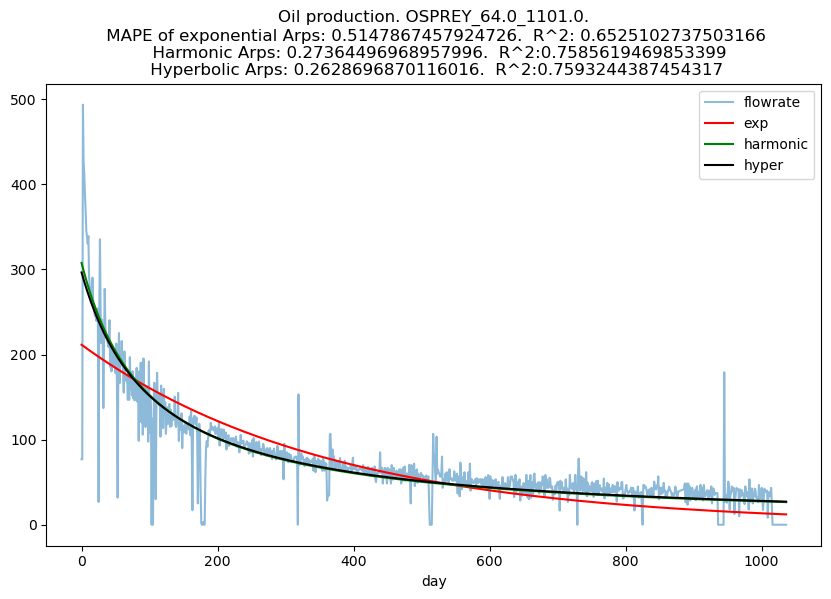

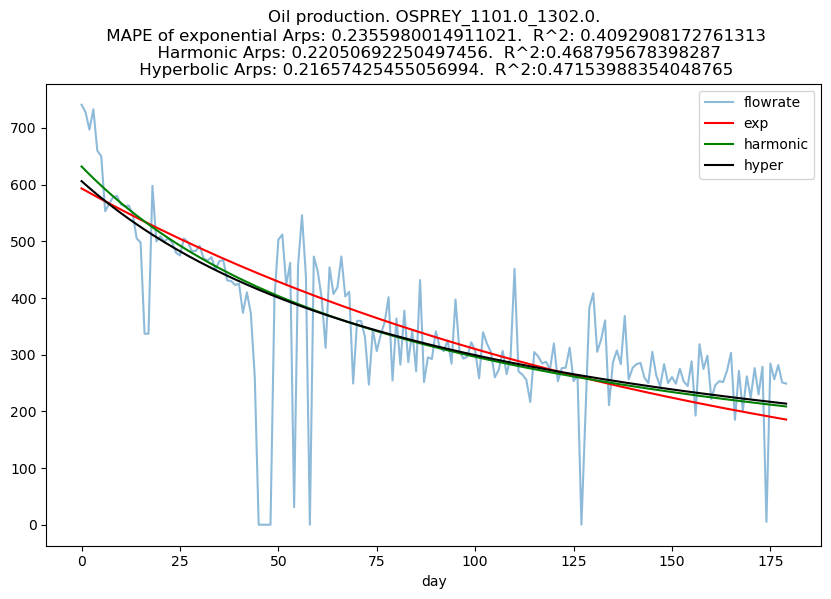

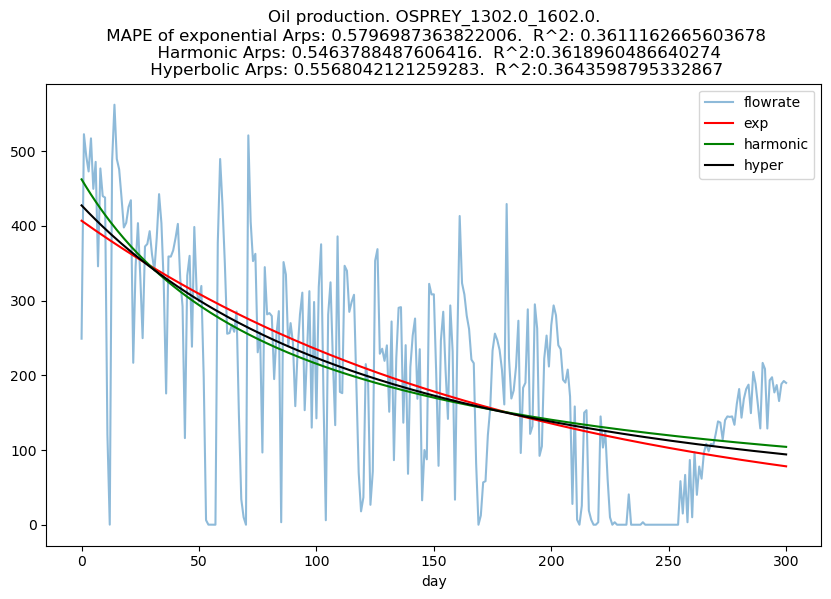

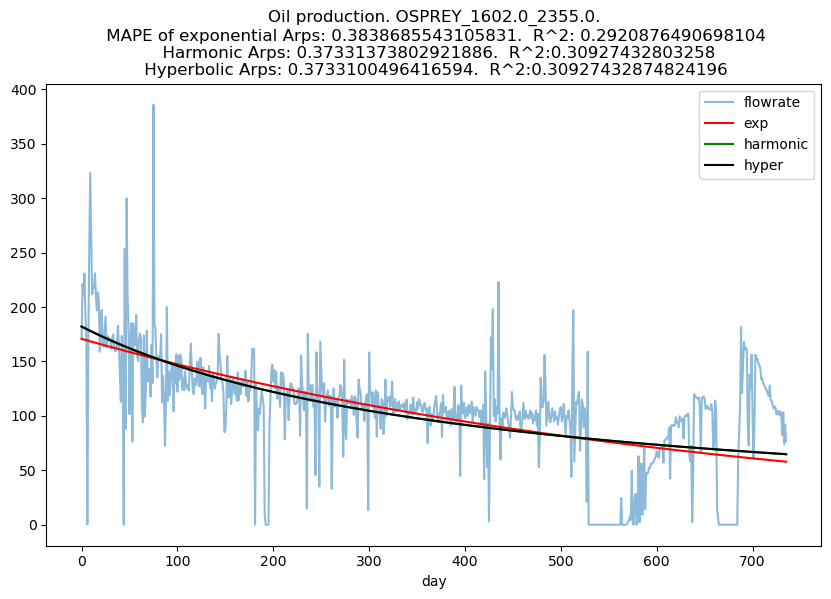

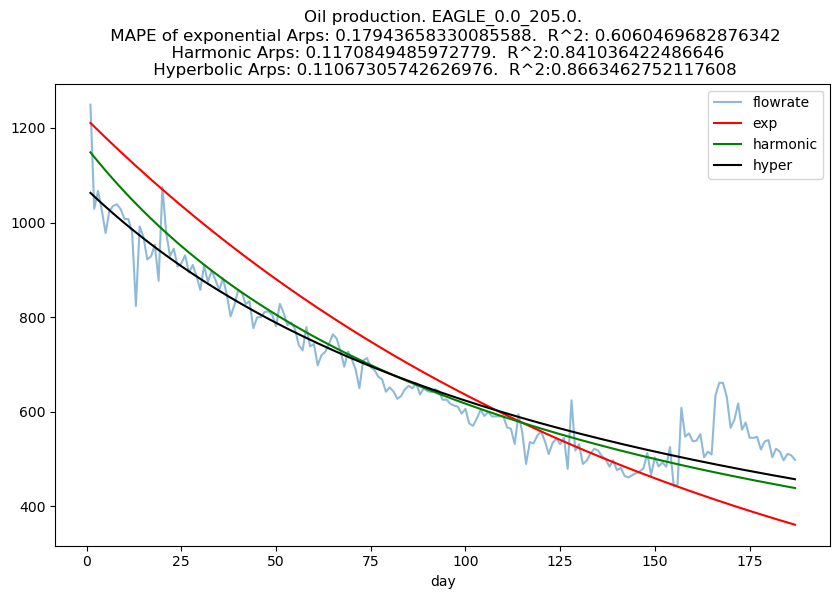

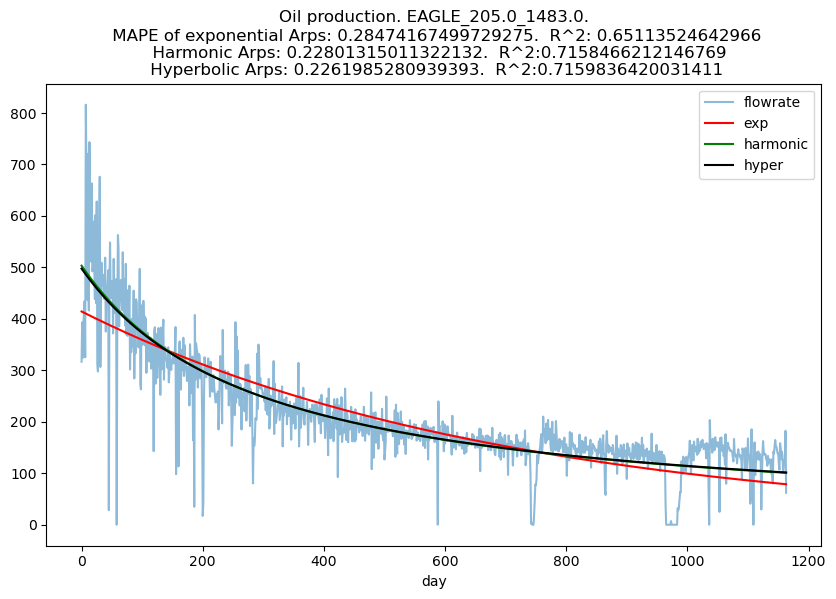

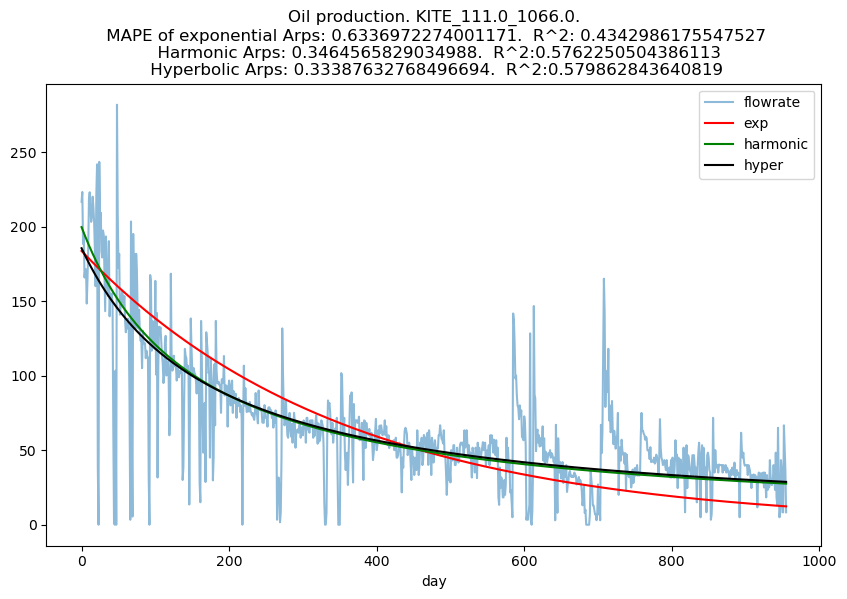

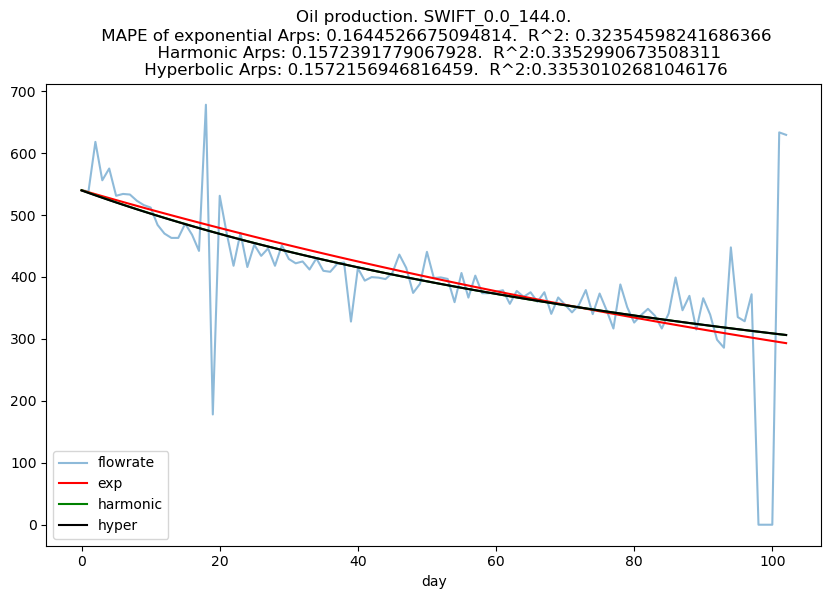

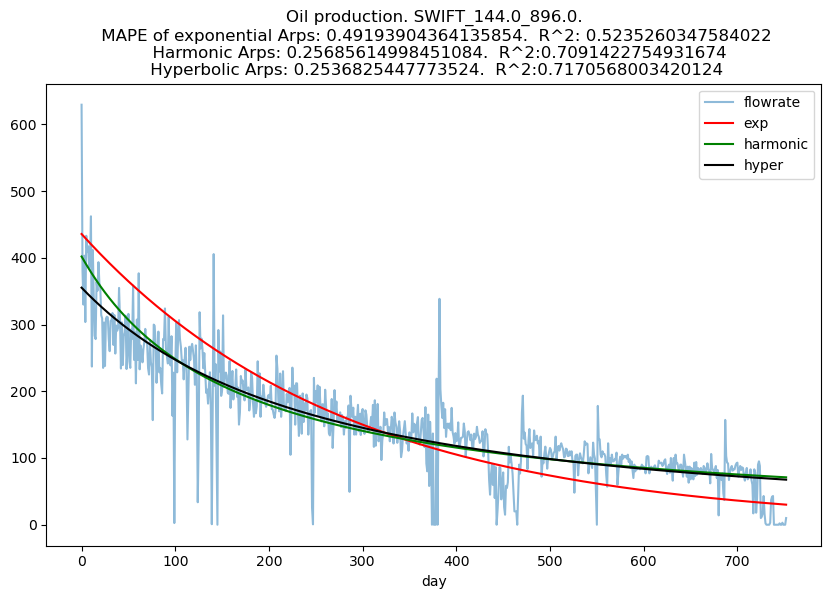

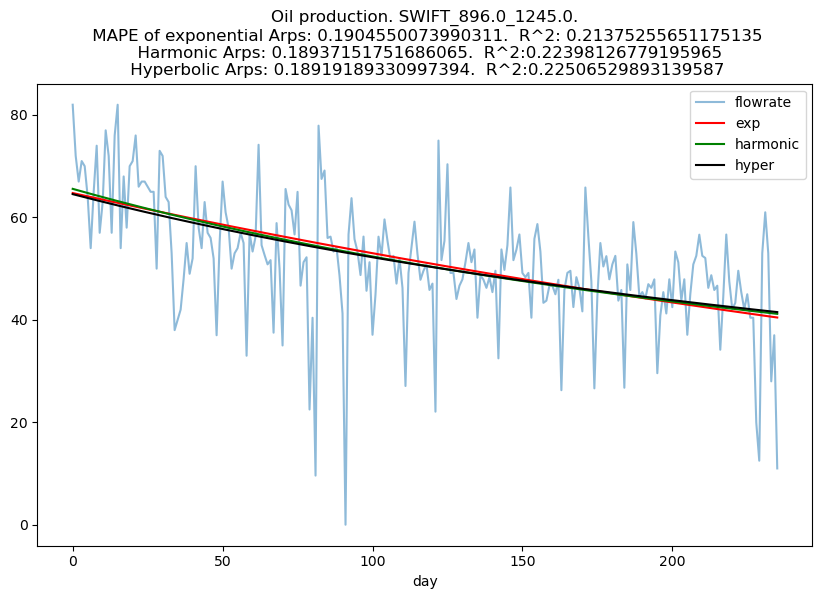

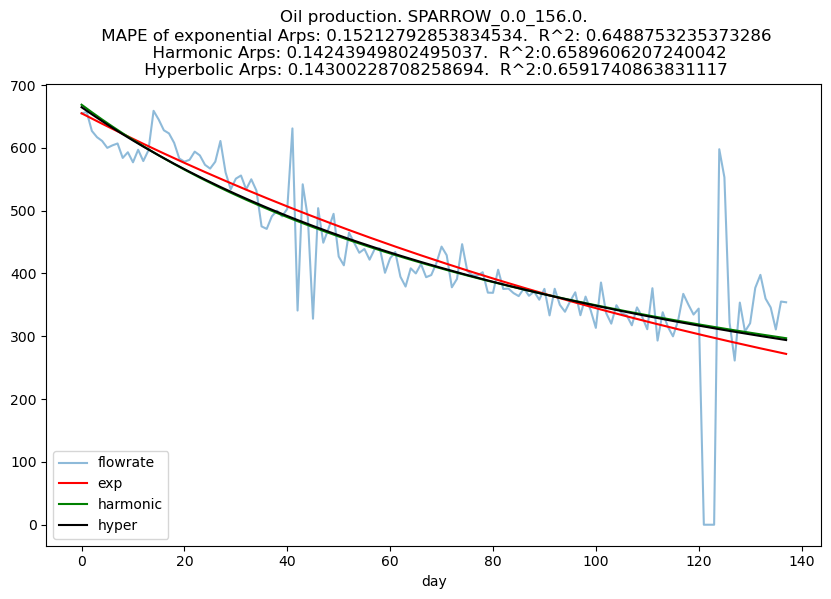

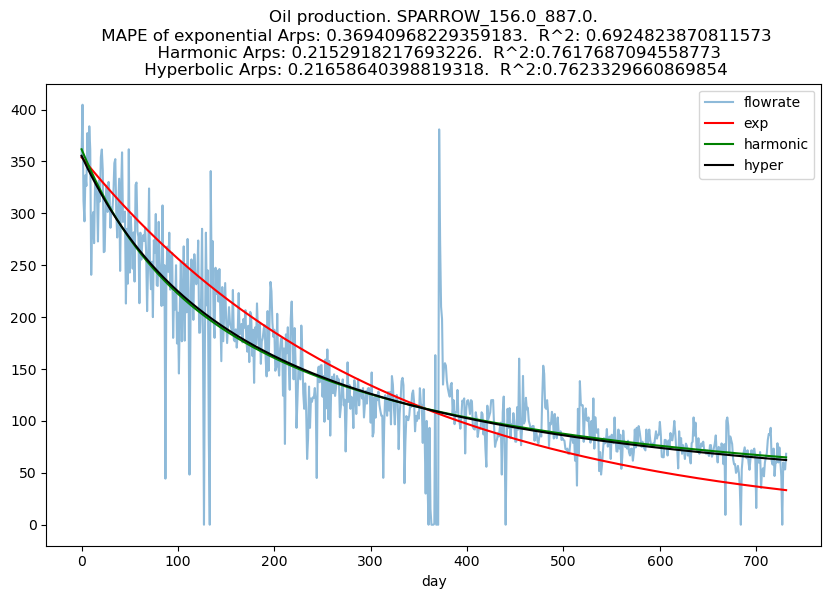

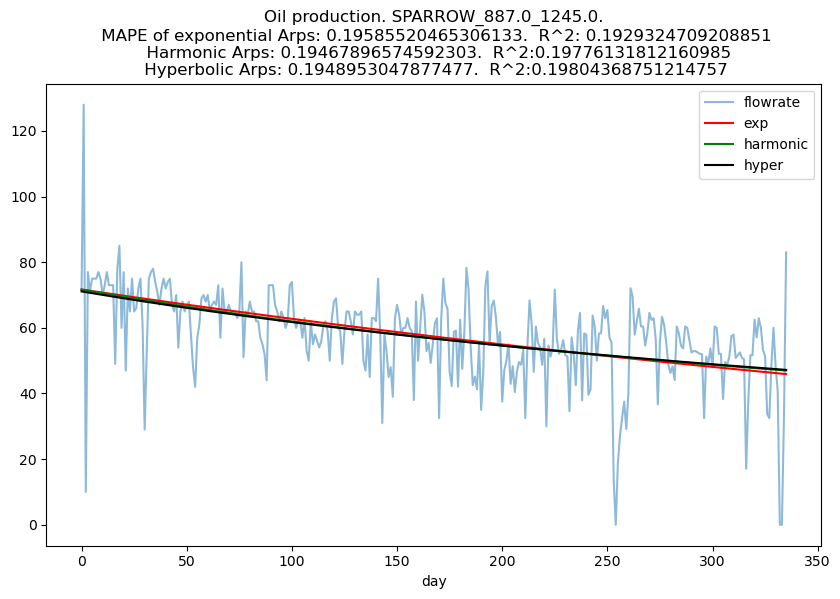

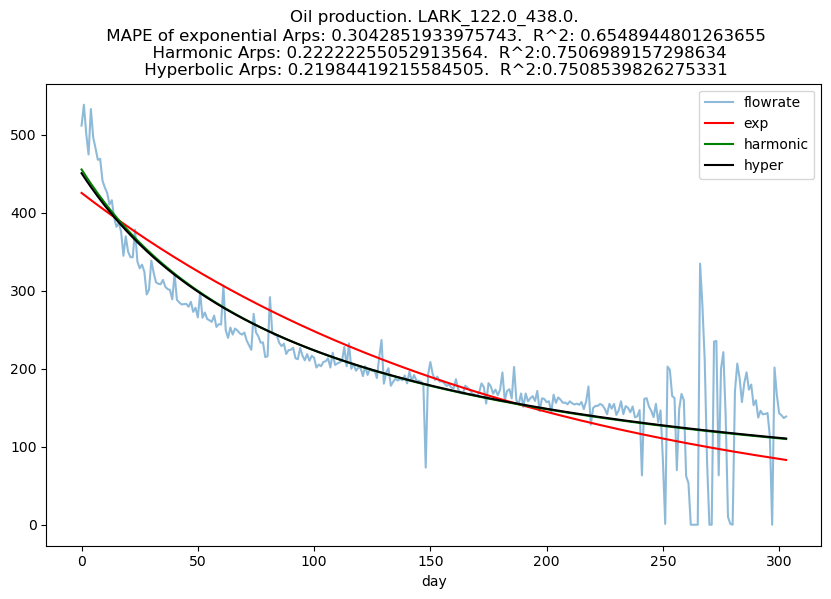

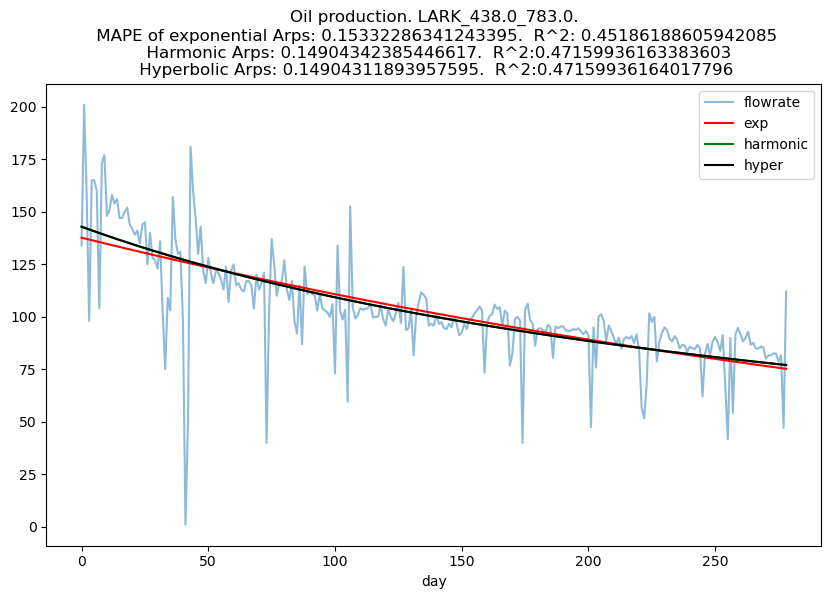

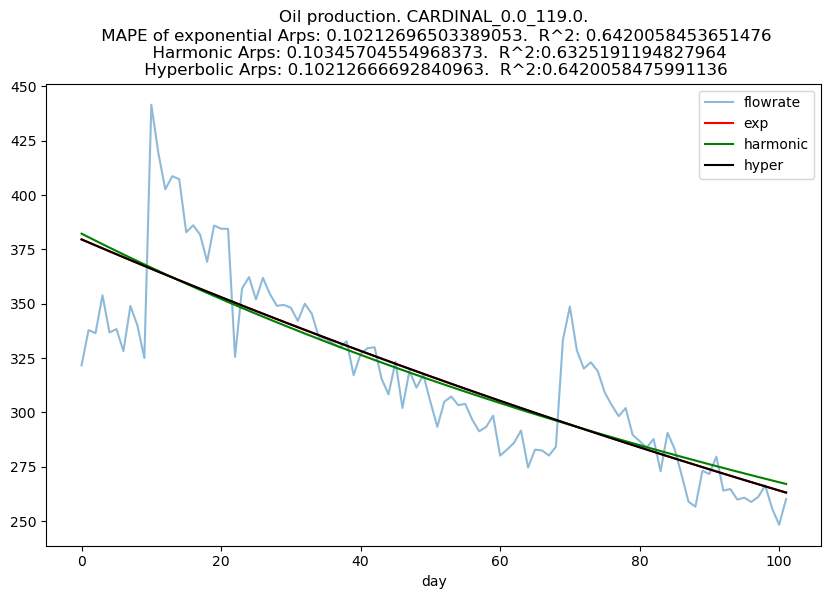

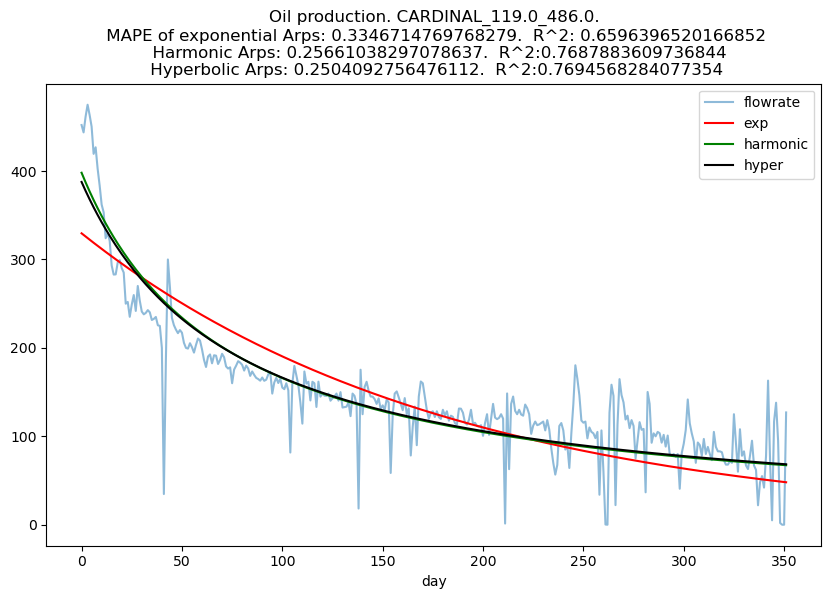

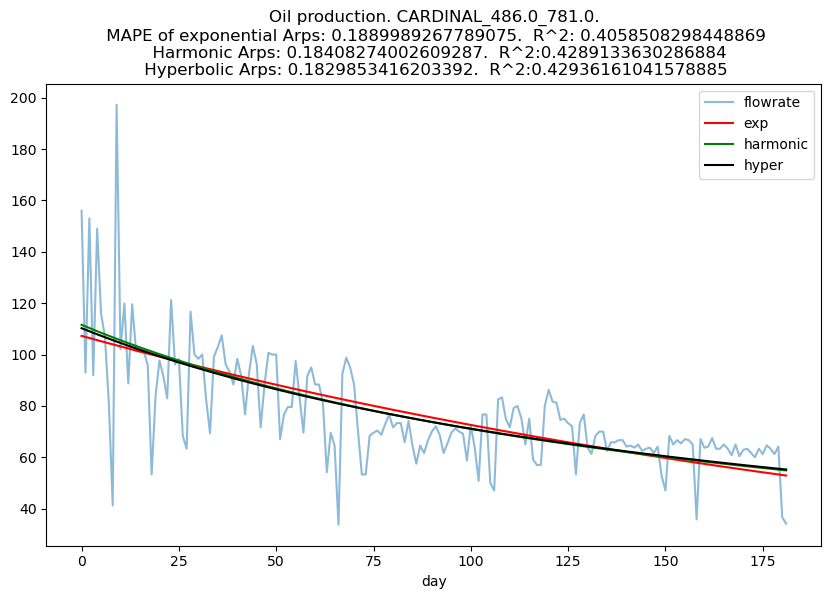

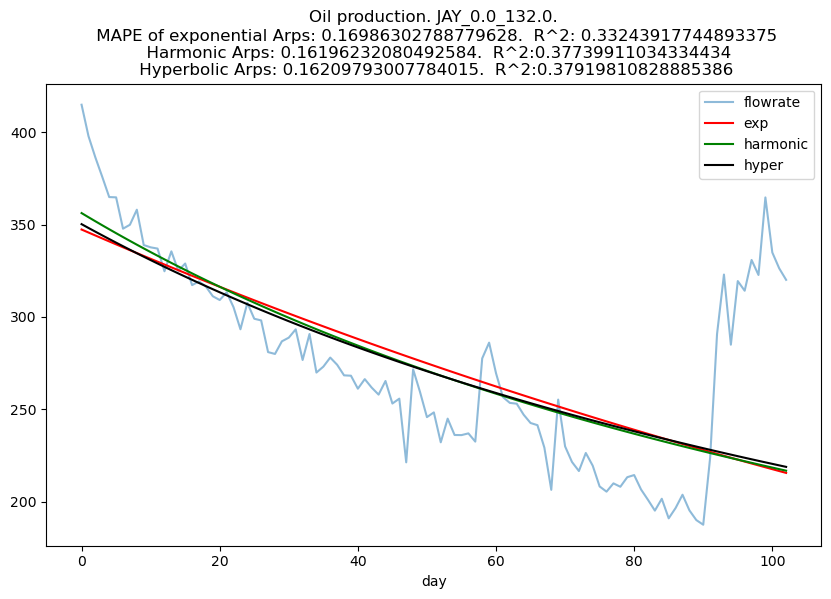

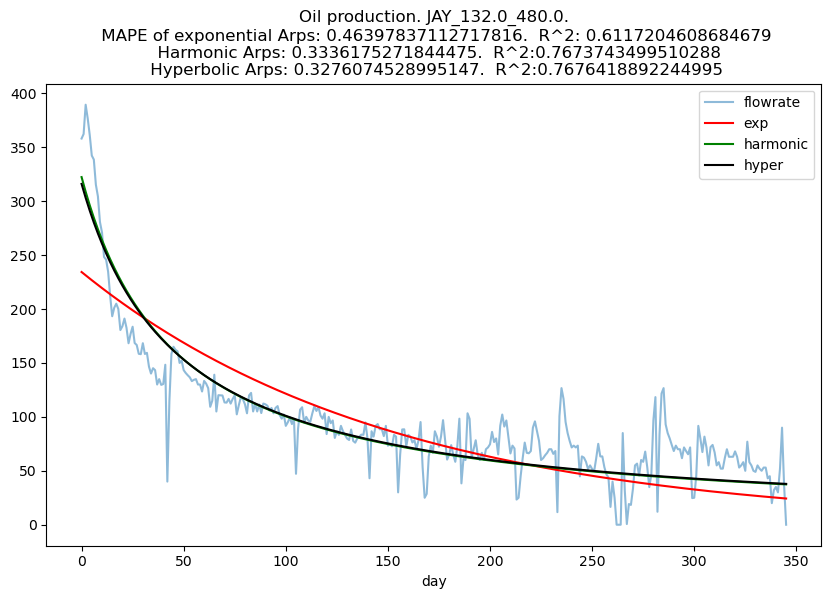

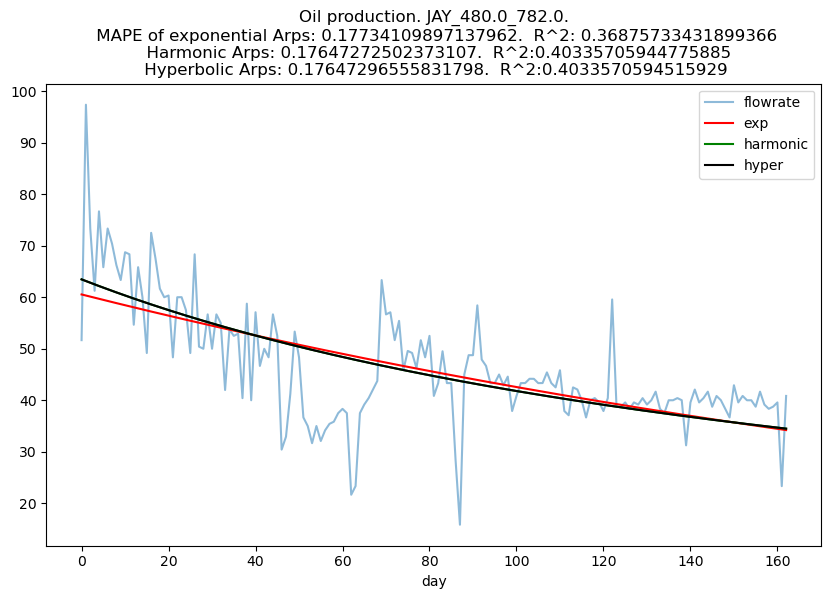

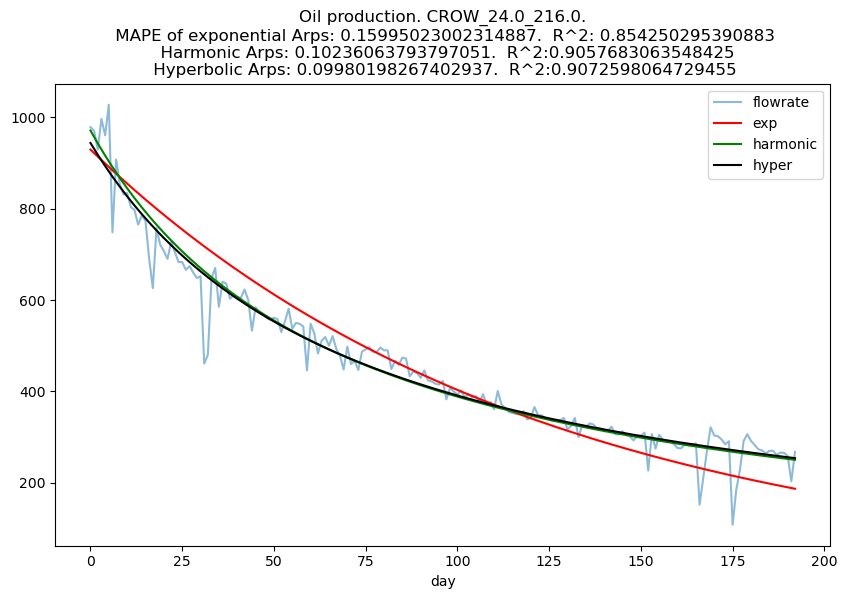

In [20]:
for period in periods_oil:
    qi = results_oil.loc[period, 'qi_expon']
    b = 0
    Di = results_oil.loc[period, 'D_expon']
    qi_hyper = results_oil.loc[period, 'qi_hyper']
    b_hyper = results_oil.loc[period, 'b_hyper']
    Di_hyper = results_oil.loc[period, 'Di_hyper']
    qi_harmonic = results_oil.loc[period, 'qi_harmonic']
    b_harmonic = 0
    Di_harmonic = results_oil.loc[period, 'Di_harmonic']
    fig, ax = plt.subplots(figsize=(10,6))
    actual = production_oil.query('period == @period')
    actual.plot.line('day',
                        'flowrate', 
                        legend=False,
                        ax=ax,
                     alpha=0.5,
                       title='Oil production. {}.\n MAPE of exponential Arps: {}.  R^2: {}\n  Harmonic Arps: {}.  R^2:{}\n Hyperbolic Arps: {}.  R^2:{}'\
                             .format(period, 
                                     results_oil.loc[period, 'rel_error_expon'],
                                     results_oil.loc[period, 'R2_expon'],
                                    results_oil.loc[period, 'rel_error_harmonic'],
                                     results_oil.loc[period, 'R2_harmonic'],
                                     results_oil.loc[period, 'rel_error_hyper'],
                                    results_oil.loc[period, 'R2_hyper']))
    flowrate_pred = actual.day.apply(exponential_arps, **{'qi': qi, 'b': b, 'Di': Di})
    plt.plot(actual.day, flowrate_pred, 'r', label='exp')
    flowrate_pred_harmonic = actual.day.apply(harmonic_arps, **{'qi': qi_harmonic, 'b': b_harmonic, 'Di': Di_harmonic})
    plt.plot(actual.day, flowrate_pred_harmonic, 'g', label='harmonic')
    flowrate_pred_hyper = actual.day.apply(hyperbolic_arps, **{'qi': qi_hyper, 'b': b_hyper, 'Di': Di_hyper})
    plt.plot(actual.day, flowrate_pred_hyper, 'k', label='hyper')
    plt.legend()
    plt.show();